<a href="https://colab.research.google.com/github/aanushkaguptaa/Calculator/blob/main/EmailSpamUsingNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Importing the DataSet

In [ ]:
df=pd.read_csv("/content/spam_ham_dataset.csv")

In [ ]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.text[:4]

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
Name: text, dtype: object

In [ ]:
df.text[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

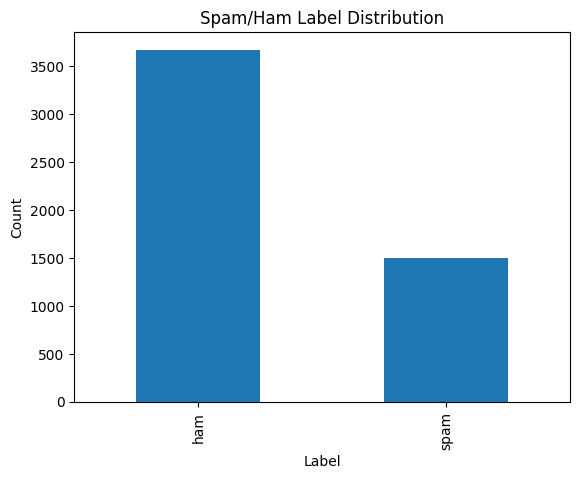

In [ ]:


import math
import matplotlib.pyplot as plt

df.label.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Spam/Ham Label Distribution')
plt.show()

In [ ]:
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
spam=df[df['label_num']==1]

In [ ]:
ham=df[df['label_num']==0]

In [ ]:
spam.shape,ham.shape

((1499, 3), (3672, 3))

In [ ]:
ham=ham.sample(1400,random_state=30)
spam=spam.sample(1400,random_state=30)

In [ ]:
spam.shape,ham.shape

((1400, 3), (1400, 3))

In [ ]:
# new_df=pd.merge(spam,ham)

Splitting of DataSet

In [ ]:
from sklearn.model_selection import train_test_split
X=df.text
y=df.label_num
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape,y_test.shape

((3878,), (1293,))

In [ ]:
X_train[:4]

5053    Subject: lose pounds instantly\r\n- - - - 1821...
1594                  Subject: women change your life\r\n
4994    Subject: feature pick to deiiver sudden surge\...
4950    Subject: \r\n( envelope - from 20040929124340 ...
Name: text, dtype: object

In [ ]:
y_train[:4]

5053    1
1594    1
4994    1
4950    1
Name: label_num, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object.
cv = CountVectorizer()

# Get the term-document matrix.
tcv = cv.fit_transform(X_train.values)

# Print the term-document matrix.
print(tcv)

  (0, 36995)	1
  (0, 25167)	2
  (0, 31037)	1
  (0, 22243)	1
  (0, 861)	2
  (0, 12054)	2
  (0, 39271)	1
  (0, 38021)	1
  (0, 30581)	1
  (0, 10387)	1
  (0, 22666)	1
  (0, 4081)	1
  (0, 38792)	1
  (0, 16029)	1
  (0, 8038)	1
  (0, 10319)	1
  (0, 42280)	5
  (0, 24707)	2
  (0, 41412)	2
  (0, 29229)	1
  (0, 33522)	1
  (0, 41029)	5
  (0, 25170)	2
  (0, 37504)	1
  (0, 12126)	3
  :	:
  (3875, 29052)	1
  (3875, 22608)	1
  (3875, 33019)	1
  (3875, 37117)	1
  (3875, 20337)	1
  (3875, 6689)	1
  (3875, 28638)	1
  (3876, 36995)	1
  (3876, 13217)	1
  (3876, 18568)	1
  (3876, 8324)	1
  (3876, 6010)	1
  (3876, 972)	1
  (3876, 12096)	1
  (3876, 18748)	1
  (3877, 36995)	1
  (3877, 18044)	1
  (3877, 29805)	1
  (3877, 29290)	1
  (3877, 31311)	1
  (3877, 41243)	1
  (3877, 31133)	1
  (3877, 15089)	1
  (3877, 19702)	1
  (3877, 34691)	1


In [ ]:
cv.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [ ]:
cv.get_stop_words()

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [ ]:
model.fit(tcv,y_train)

MultinomialNB()

In [ ]:
model.score(cv.transform(X_test),y_test)

0.9636504253673627

In [ ]:
from sklearn.metrics import classification_report

# Get the predicted labels and the true labels
predicted_labels = model.predict(cv.transform(X_test))
true_labels = y_test

# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       896
           1       0.96      0.92      0.94       397

    accuracy                           0.96      1293
   macro avg       0.96      0.95      0.96      1293
weighted avg       0.96      0.96      0.96      1293



In [ ]:
check=['asdfghjk hnjkjbvcdg',"hello boy i am here 5m to left free of cost"]

In [ ]:
model.predict(cv.transform(check))

array([1, 1])

1=spam